In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
#Lineer Regresyon
"""
y = b0 + b1*x
y -> hedef değişken (target variable) veya yanıt (response), bağımlı değişken
x -> öznitelik (feature), bağımsız değişken
b1 -> katsayı (coefficient)
b0 -> intercept
"""

In [4]:
#bağımlı-bağımsız değişkenleri ayırma
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary'] 

In [5]:
#Veriyi bölme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [7]:
import warnings
warnings.filterwarnings('ignore')

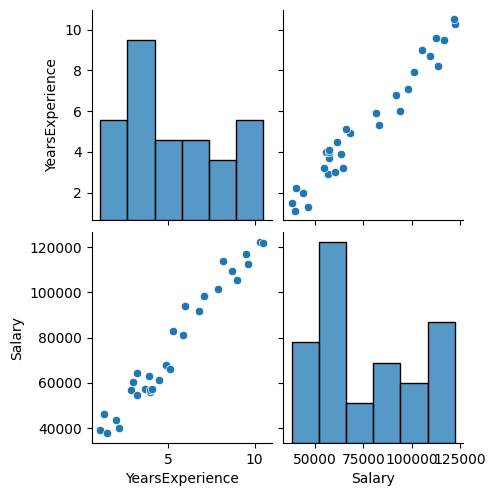

In [8]:
sns.pairplot(dataset)
plt.show()

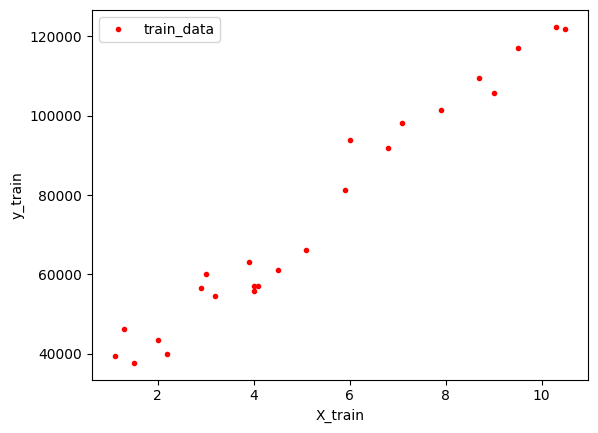

In [9]:
plt.plot(X_train, y_train, 'r.', label = 'train_data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

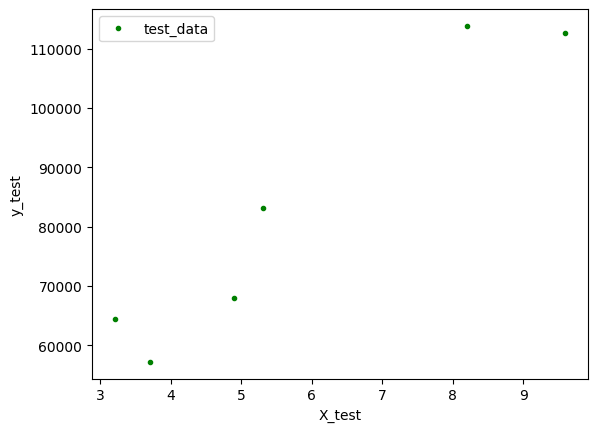

In [10]:
plt.plot(X_test, y_test, 'g.', label = 'test_data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test).round(1)

In [17]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Salary', 'Predicted Salary'])
hesaplama

,Original Salary,Predicted Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


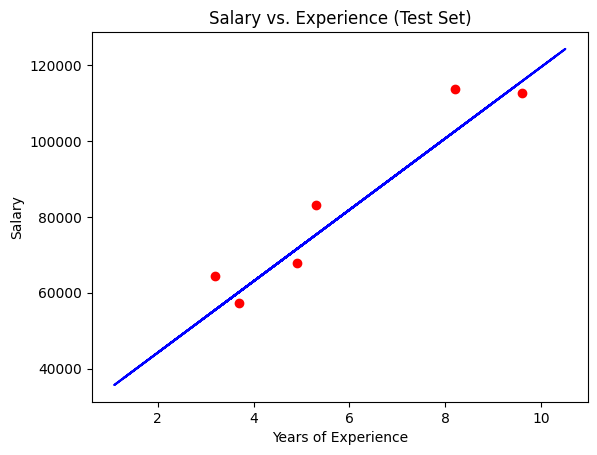

In [18]:
#Test kümesi sonuçlarını görselleştirme
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs. Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred) #1'e ne kadar yakınsa o kadar iyi tahmindir. 

mae = mean_absolute_error(y_test, y_pred) #model tahminlerinin ortalama mutlak hatası. gerçek değerden ne kadar sapıldı.

mse = mean_squared_error(y_test, y_pred) #hataların karesini alarak ortalamasını hesaplar. büyük hataların ağırlığı yüksek olur. 

rmse = mean_squared_error(y_test, y_pred, squared = False) #MSE'nin karekökünü alarak daha açıklanabilir bir sonuç üretir.

#sonuçlar
print(f'R2 score: {r2:.2f}')
print(f'MAE score: {mae:.2f}')
print(f'MSE score: {mse:.2f}')
print(f'RMSE score: {rmse:.2f}')

R2 score: 0.90
MAE score: 6286.45
MSE score: 49829982.59
RMSE score: 7059.04
